## load often use libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
import matplotlib as mpl
mpl.rcParams['font.family']='IPAexGothic'
#sns.set(rc={'figure.facecolor':'white'})

## read data and preperation(exsample : titanic)

In [3]:
PATH = "./titanic_input/"

In [4]:
train = pd.read_csv(PATH+"train.csv")
test = pd.read_csv(PATH+"test.csv")
gender_submission = pd.read_csv(PATH+"gender_submission.csv")

前処理が必要な場合
```python
dataset = pd.concat((train,test),ignore_index=True)
dataset["Age"] = dataset["Age"].fillna(dataset['Age'].median())
dataset['Embarked'] = dataset['Embarked'].fillna('S') 
dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].mean())
train = dataset[:len(train)]
test = dataset[len(train):]
```

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# one-dimensional data

## countplot(データ件数の集計)

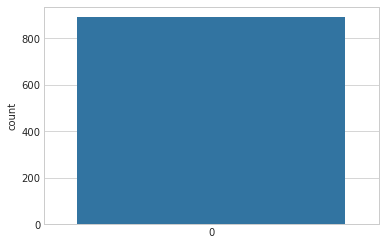

In [5]:
plt.figure(facecolor='white')
sns.countplot(data=train['Pclass'])
plt.show()

In [5]:
train['Embarked'] = train['Embarked'].fillna('S') 

C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


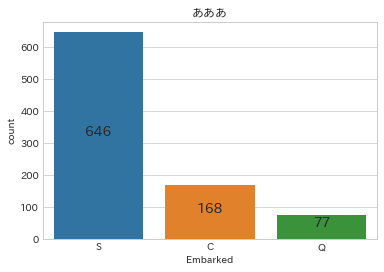

In [6]:
view = train["Embarked"]

l_order=view.value_counts().index.to_list()
graph = view.apply(lambda x: l_order.index(x) if x in l_order else -1)

plt.figure(facecolor='white')
sns.countplot(graph)
for col,num in enumerate(view.value_counts()):
    plt.text(col, num/2, str(num),ha='center',fontsize=14)
plt.xticks(range(len(l_order)),l_order)
plt.show()

## distplot(Histgram) 度数分布図(ヒストグラム)

スタージェスの公式 : 度数分布の階級幅,階級数の指標.  
データの数$n$とすると階級数$k$は次を目安にするとよい.
$$ k = 1+log_{2}n $$

### seaborn.FacetGrid
```python
g = sns.FacetGrid(data) # make instance 
g.map(sns.distplot,"column") # draw
```

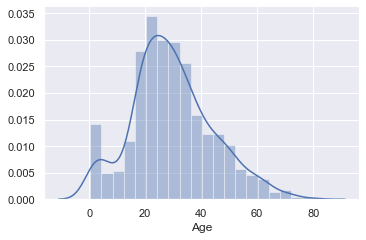

In [36]:
g = sns.FacetGrid(train,height=3.5, aspect=1.5)
g.map(sns.distplot, "Age")

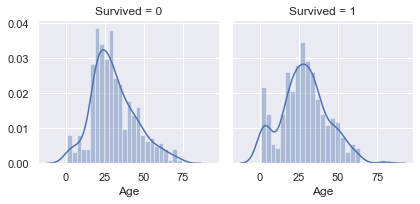

In [33]:
g = sns.FacetGrid(train,col="Survived")
g.map(sns.distplot, "Age",bins=25)

### seaborn.distplot
Parameter:  
``bins`` : Specification of hist bins. If unspecified, as reference rule is used that tries to find a useful default.  
(指定されていない場合は,有用なデフォルト値を見つけようとする参照ルールが使用されます.)  
  
``kde`` : bool, optional  
Whether to plot a gaussian kernel density estimate.

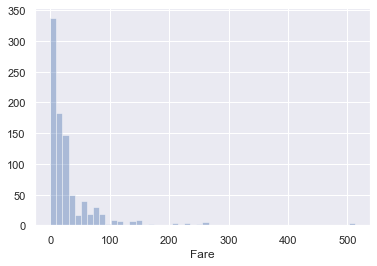

In [28]:
plt.figure(facecolor='white')
sns.distplot(a=train["Fare"],kde=False)
plt.show()

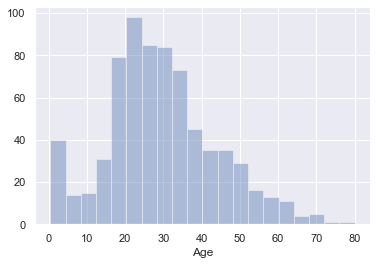

In [34]:
plt.figure(facecolor='white')
sns.distplot(a=train["Age"][train["Age"].notnull()],kde=False)
plt.show()

## kdeplot(Kernel Density Estimate plot)
Kernel Density Estimate...カーネル密度推定

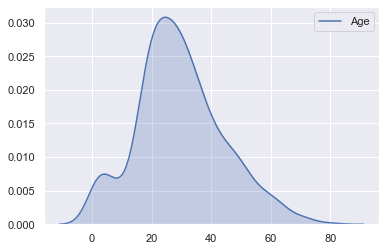

In [46]:
g = sns.kdeplot(train["Age"][train["Age"].notnull()], shade = True)

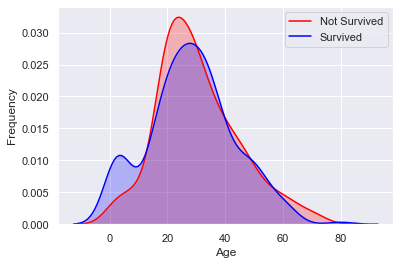

In [32]:
g = sns.kdeplot(train["Age"][(train["Survived"] == 0) & (train["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

## lineplot(折れ線グラフ)

In [63]:
# read sample data
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


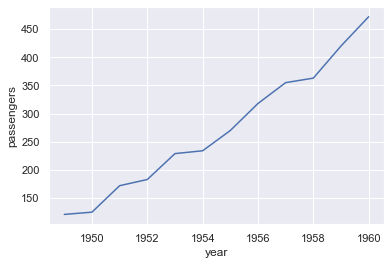

In [62]:
may_flights = flights[flights["month"]=="May"] # select only may
sns.lineplot(data=may_flights, x="year", y="passengers")

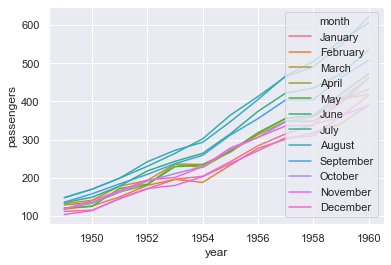

In [64]:
sns.lineplot(data=flights, x="year", y="passengers", hue="month")

## normal probability plot(正規QQプロット)

In [65]:
from scipy import stats

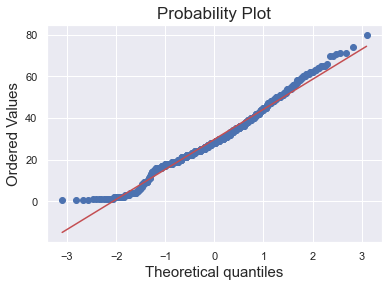

In [69]:
plt.figure(facecolor='white')
stats.probplot(train['Age'][train["Age"].notnull()],dist=stats.norm,plot=plt)
plt.xlabel("Theoretical quantiles",fontsize = 15)
plt.ylabel("Ordered Values",fontsize = 15)
plt.title("Probability Plot",fontsize = 17)
plt.show()

# two-dimensional data

## factorplot(種別比較図)

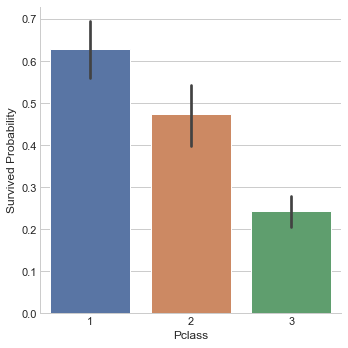

In [89]:
g = sns.factorplot(x = "Pclass", y = "Survived", data = train,kind = "bar")
g.set_ylabels("Survived Probability")
plt.show()

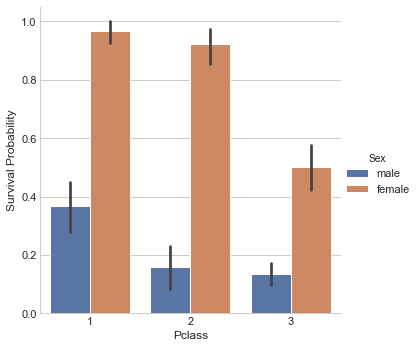

In [88]:
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=train,kind = "bar")
g.set_ylabels('Survival Probability')

## barplot(データの平均値と信頼区間)

Text(0, 0.5, 'Survival Probability')

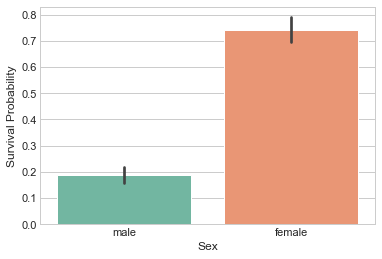

In [80]:
g = sns.barplot(x='Sex', y='Survived', data=train, palette='Set2')
g.set_ylabel('Survival Probability')

Text(0, 0.5, 'Survival Probability')

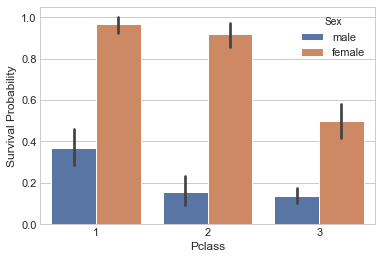

In [94]:
g = sns.barplot(x="Pclass", y="Survived",hue="Sex", data=train)
g.set_ylabel('Survival Probability')

## scatterplot(散布図)

In [102]:
# read sample data
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


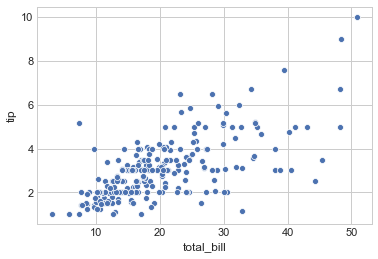

In [107]:
sns.scatterplot(data=tips, x="total_bill", y="tip")

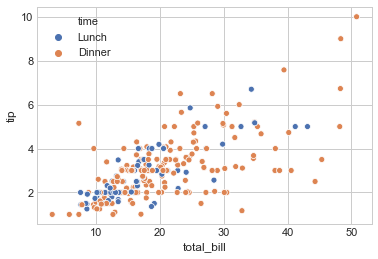

In [109]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")# style=timeを追加してもよい

## boxplot(箱ひげ図)

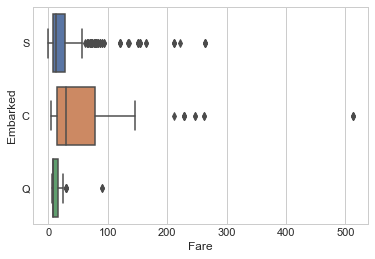

In [101]:
plt.figure(facecolor='white')
sns.boxplot(x='Fare', y='Embarked',data=train)

## regplot(scatter+regression)

In [5]:
# read sample data
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


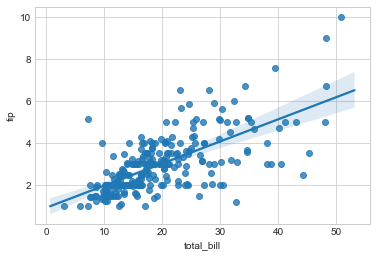

In [7]:
plt.figure(facecolor="white")
g = sns.regplot(x="total_bill", y="tip", data=tips)

## lmplot

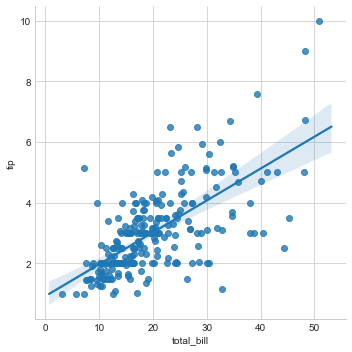

In [8]:
g = sns.lmplot(x="total_bill", y="tip", data=tips)

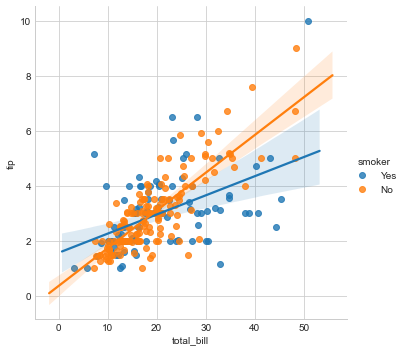

In [9]:
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

## jointplot

In [3]:
# load sample data
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


<Figure size 432x288 with 0 Axes>

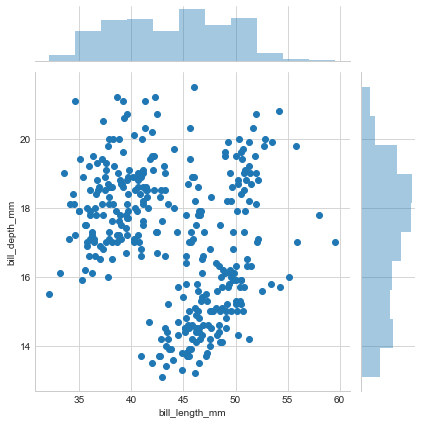

In [12]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

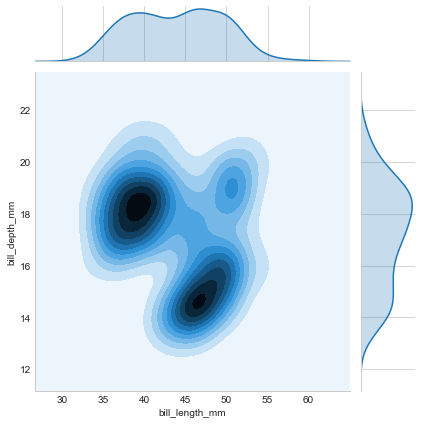

In [18]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm",kind="kde")

## heatmap

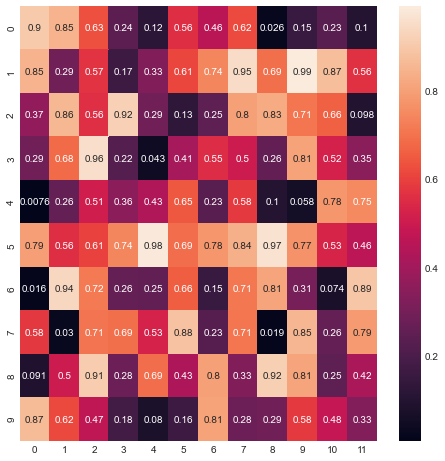

In [9]:
uniform_data = np.random.rand(10, 12)

plt.figure(figsize=(8,8),facecolor="white")
sns.heatmap(uniform_data,annot=True)

### Correlation map
``pearson`` : ピアソンの積率相関係数  
データ($x_1$,$y_1$), ... ,($x_n$,$y_n$)について,分散$s_x^2$,$s_y^2$,共分散$s_{xy}$
とするとピアソンの相関係数$r$は
$$r = \frac{s_{xy}}{s_x s_y}$$  
  
``spearman`` : スピアマンの順位相関係数  
順位相関係数とは2つの質的基準があるときに,2つの基準による順位の相関を表す指標である.
2つの基準による順位$R_i$,$R_i'$とするとspearmanの順位相関係数$r_s$は
$$r_s = 1 -\frac{6}{n(n^2-1)} \Sigma ^n _{i=1} (R_i-R_i')^2$$  
  
``kendoll`` : ケンドールの順位相関係数  
観測対象の対(i,j)(i,j=1,2, ... ,n)について正順すなわち$R_i < R_j$,$R_i' < R_j'$ or $R_i > R_j$,$R_i' > R_j'$のとき+1,逆順のとき-1を与え,+1を与えた対の数G,-1を与えた対の数Hとするとケンドールの順位相関係数$r_k$は
$$r_k = \frac{2(G-H)}{n(n-1)}$$  
  
参考 : 統計学入門 東京大学教養学部統計教室編

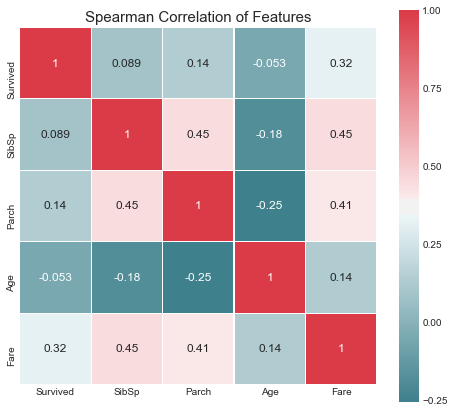

In [12]:
fig , ax = plt.subplots(figsize =(8, 8),facecolor='white')
colormap = sns.diverging_palette(210,10, as_cmap = True)
corr = train[["Survived","SibSp","Parch","Age","Fare"]].corr(method='spearman') # pearson spearman kendall
fig = sns.heatmap(
        corr, 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, #めちゃくちゃになったらFalse
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
plt.title('Spearman Correlation of Features', y=1.05, size=15) # pearson spearman kendall
plt.show()

## swarmplot

In [13]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


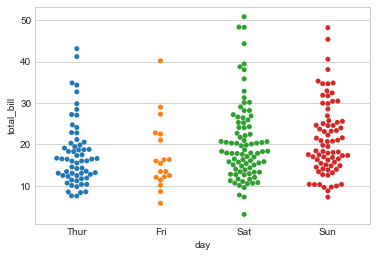

In [18]:
plt.figure(facecolor="white")
sns.swarmplot(x="day", y="total_bill", data=tips)

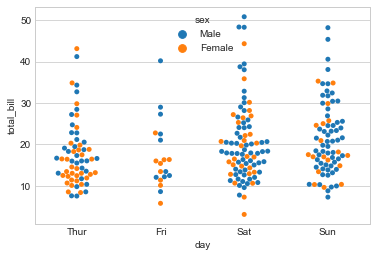

In [21]:
plt.figure(facecolor="white")
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)

In [6]:
import matplotlib as mpl
mpl.matplotlib_fname()

'C:\\Users\\yudai\\anaconda3\\envs\\py38-gpu\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'